In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline


In [ ]:
import warnings
warnings.filterwarnings("ignore")

##Задания для самостоятельного выполнения



#### 1. Загрузите прилагающийся датасет.

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### 2. Проверьте датасет на наличие пустых значений. Если есть пустые значения, то заменить их на наиболее подходящие.

In [ ]:
df.isnull().sum()


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

####3. Постройте графическую интерпретацию значений датасета. В качестве x-координаты используйте Annual Income, в качестве y-координаты Spending Score.

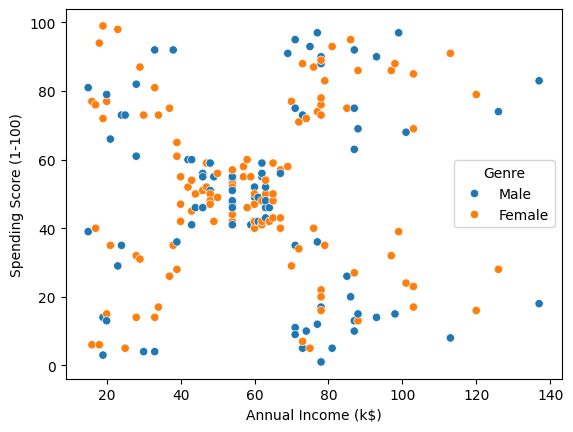

In [ ]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Genre')
plt.show()


Вывод: из данного графика видно, что люди по уровню дохода и оценке расходов четко делятся на 5 кластеров.

####4. Определите наилучшее число кластеров с помощью графической зависимости числа кластеров от суммы квадратов расстояний значений датасета до центра кластера.

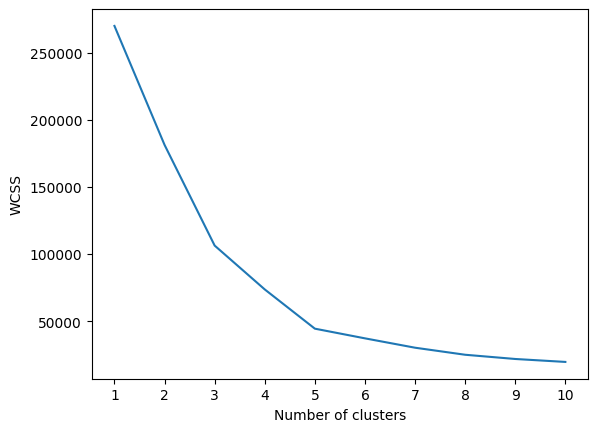

In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Методом локтя определим оптимальное количество кластеров. Как было указано ранее, наилучшим количеством кластеров будет пять или три.

####5. Обучить модель К-средних и предсказать кластер для каждого значения из датасета.

In [ ]:
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
y_kmeans = kmeans.fit_predict(X)


####6. Построить графическую интерпретацию из пункта 3, с центрами кластеров.

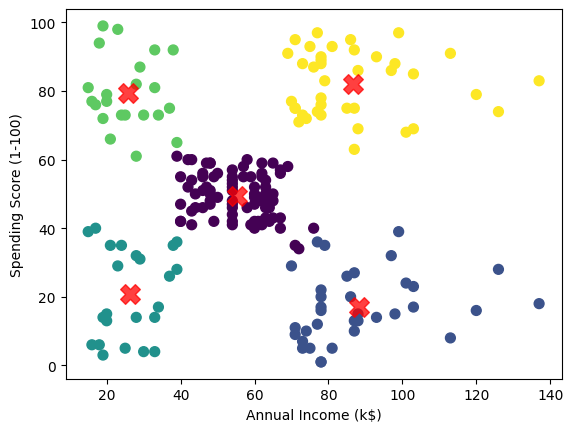

In [ ]:
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


Вывод: данные чётко и достаточно точно разделились на пять кластеров.








####7. Построить графическую интерпретацию с центрами кластеров, в качестве x-координаты используйте Возраст, в качестве y-координаты Spending Score.

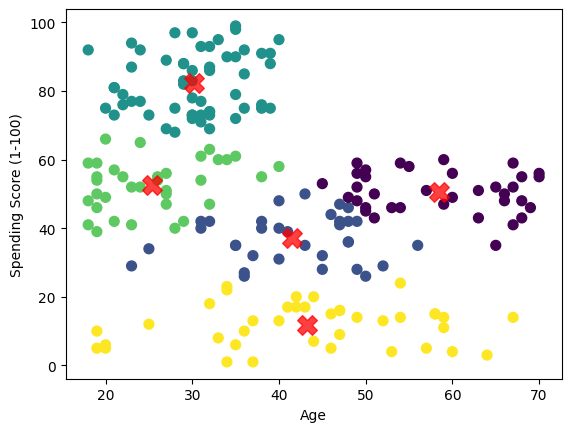

In [ ]:
X_age = df[['Age', 'Spending Score (1-100)']]

kmeans_age = KMeans(n_clusters=optimal_clusters, random_state=42)
y_kmeans_age = kmeans_age.fit_predict(X_age)

plt.scatter(X_age['Age'], X_age['Spending Score (1-100)'], c=y_kmeans_age, s=50, cmap='viridis')
centers_age = kmeans_age.cluster_centers_
plt.scatter(centers_age[:, 0], centers_age[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()


Вывод: визуально данные по возрасту и расходам разделяются на кластеры менее чётко.

####8. Оцените модель с помощью метрик.

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


In [ ]:
silhouette_avg = silhouette_score(X, y_kmeans)
calinski_harabasz = calinski_harabasz_score(X, y_kmeans)
davies_bouldin = davies_bouldin_score(X, y_kmeans)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Calinski-Harabasz Index: {calinski_harabasz}')
print(f'Davies-Bouldin Score: {davies_bouldin}')


Silhouette Score: 0.553931997444648
Calinski-Harabasz Index: 247.35899338037282
Davies-Bouldin Score: 0.5725628995597081



1. **Silhouette Score**: 0.5539
2. **Calinski-Harabasz Index**: 247.36
3. **Davies-Bouldin Score**: 0.5726

#### Интерпретация метрик:

1. **Silhouette Score**: Значение этой метрики колеблется от -1 до 1. Значение ближе к 1 указывает на хорошо сформированные кластеры, в то время как значение ближе к -1 указывает на неправильное распределение. Результат 0.5539 показывает, что кластеры довольно хорошо разделены.

2. **Calinski-Harabasz Index**: Чем выше значение этой метрики, тем лучше структурированы кластеры. Значение 247.36 указывает на хорошую плотность и разделение кластеров.

3. **Davies-Bouldin Score**: Эта метрика принимает значения от 0 и выше, причем более низкие значения указывают на лучшее качество кластеризации. Значение 0.5726 говорит о том, что кластеры имеют хорошие внутренние различия.

#### Выводы:

Результаты метрик показывают, что данные хорошо и четко разделились на кластеры, особенно с использованием пяти кластеров. Высокий Silhouette Score и Calinski-Harabasz Index в сочетании с низким Davies-Bouldin Score указывают на успешное разделение данных на кластеры.

####9. Сравните эффективность модели кластеризации в зависимости от количества кластеров. Сделайте выводы.

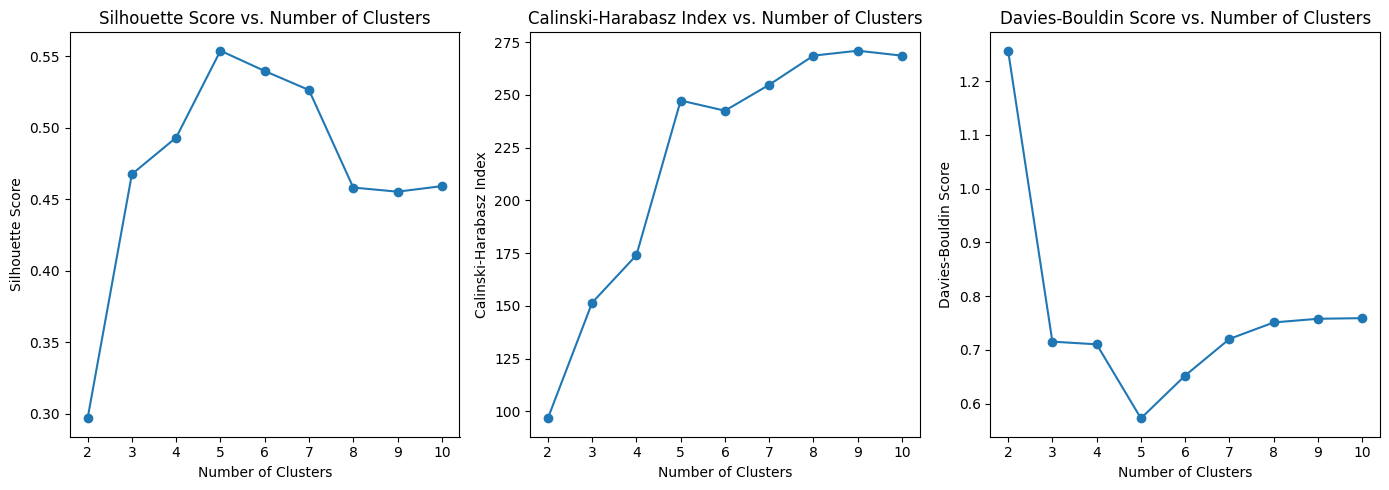

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    y_kmeans = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, y_kmeans))
    calinski_harabasz_scores.append(calinski_harabasz_score(X, y_kmeans))
    davies_bouldin_scores.append(davies_bouldin_score(X, y_kmeans))

plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')

plt.subplot(1, 3, 2)
plt.plot(range(2, 11), calinski_harabasz_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index vs. Number of Clusters')

plt.subplot(1, 3, 3)
plt.plot(range(2, 11), davies_bouldin_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Score vs. Number of Clusters')

plt.tight_layout()
plt.show()





1. **Silhouette Score**:
   - Silhouette Score показывает, что наибольшее значение достигается при 5 кластерах, что указывает на лучшее разделение данных именно при этом количестве кластеров.
   - После 5 кластеров значение метрики начинает уменьшаться, что говорит о снижении качества кластеризации при увеличении числа кластеров.

2. **Calinski-Harabasz Index**:
   - Calinski-Harabasz Index показывает значительное увеличение при увеличении числа кластеров, достигая максимального значения при 5 кластерах.
   - Далее индекс стабилизируется, что указывает на хорошую плотность и разделение кластеров при 5 кластерах.

3. **Davies-Bouldin Score**:
   - Davies-Bouldin Score минимален при 5 кластерах, что указывает на лучшие внутренние различия между кластерами.
   - Более низкие значения этой метрики указывают на лучшее качество кластеризации.

#### Заключение:

- **Оптимальное количество кластеров**: На основании всех трех метрик (Silhouette Score, Calinski-Harabasz Index и Davies-Bouldin Score) оптимальным количеством кластеров является 5.
- **Качество кластеризации**: При 5 кластерах модель демонстрирует наилучшие результаты, что подтверждается максимальными значениями Silhouette Score и Calinski-Harabasz Index, а также минимальным значением Davies-Bouldin Score.
